# Homework 4


### Due: Monday Nov 11, at 11:59pm via Blackboard

Import the necessary panda libraries 

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

Q1. Import the stock data for Meta and Telsa and Create the respective data frames, parsing the Date variable as dates and changing the index column to Date. (2 point)

In [16]:
meta = pd.read_csv('Meta.csv', parse_dates=['Date'], index_col='Date')
meta.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,274.779999,275.000000,265.200012,268.940002,268.940002,15106100
2021-01-05,268.290009,272.399994,268.209991,270.970001,270.970001,9871600
2021-01-06,262.000000,267.750000,260.010010,263.309998,263.309998,24354100
2021-01-07,265.899994,271.609985,264.779999,268.739990,268.739990,15789800
2021-01-08,268.309998,268.950012,263.179993,267.570007,267.570007,18528300


In [17]:
tesla = pd.read_csv('Tesla.csv', parse_dates=['Date'], index_col='Date')
tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500


Q2. Merge the stock data for Meta and Tesla stock data. Include the necessary prefixes (2 points)

In [15]:
meta_tesla = meta.merge(tesla, how='right', on='Date', suffixes=('_meta', '_tsla'))
meta_tesla.head()

,Open_meta,High_meta,Low_meta,Close_meta,Adj Close_meta,Volume_meta,Open_tsla,High_tsla,Low_tsla,Close_tsla,Adj Close_tsla,Volume_tsla
Date,,,,,,,,,,,,
2021-01-04,274.779999,275.000000,265.200012,268.940002,268.940002,15106100,239.820007,248.163330,239.063339,243.256668,243.256668,145914600
2021-01-05,268.290009,272.399994,268.209991,270.970001,270.970001,9871600,241.220001,246.946671,239.733337,245.036667,245.036667,96735600
2021-01-06,262.000000,267.750000,260.010010,263.309998,263.309998,24354100,252.830002,258.000000,249.699997,251.993332,251.993332,134100000
2021-01-07,265.899994,271.609985,264.779999,268.739990,268.739990,15789800,259.209991,272.329987,258.399994,272.013336,272.013336,154496700
2021-01-08,268.309998,268.950012,263.179993,267.570007,267.570007,18528300,285.333344,294.829987,279.463318,293.339996,293.339996,225166500


 Q3a. Report the summary statistics for the Adjusted close for Tesla and Meta stocks prices. (1 point)

In [14]:
meta_tesla[['Adj Close_tsla', 'Adj Close_meta']].describe()

,Adj Close_tsla,Adj Close_meta
count,503.000000,503.000000
mean,261.542545,250.817098
std,55.775860,84.762832
min,109.099998,88.910004
25%,223.201668,170.205002
50%,251.213333,265.739990
75%,296.856659,330.300003
max,409.970001,382.179993


Q3b: What are the Ranges and Interquartile Ranges for the Adjusted Close of Tesla and Meta Stock prices? (2 point)

In [29]:
meta_iqr = meta_tesla['Adj Close_meta'].quantile(0.75) - meta_tesla['Adj Close_meta'].quantile(0.25)
tesla_iqr = meta_tesla['Adj Close_tsla'].quantile(0.75) - meta_tesla['Adj Close_tsla'].quantile(0.25)
meta_range = meta_tesla['Adj Close_meta'].max() - meta_tesla['Adj Close_meta'].min()
tesla_range = meta_tesla['Adj Close_tsla'].max() - meta_tesla['Adj Close_tsla'].min()

print(f'Meta: Range = {round(meta_range, 2)}, IQR = {round(meta_iqr, 2)}')
print(f'Tesla: Range = {round(tesla_range, 2)}, IQR = {round(tesla_iqr, 2)}')

Meta: Range = 293.27, IQR = 160.1
Tesla: Range = 300.87, IQR = 73.65


Q4. Using Seaborn, plot line graphs for the daily volumes for Meta and Tesla Stock and include the title and labels. Which stock had greater volume volatility? (3 points)

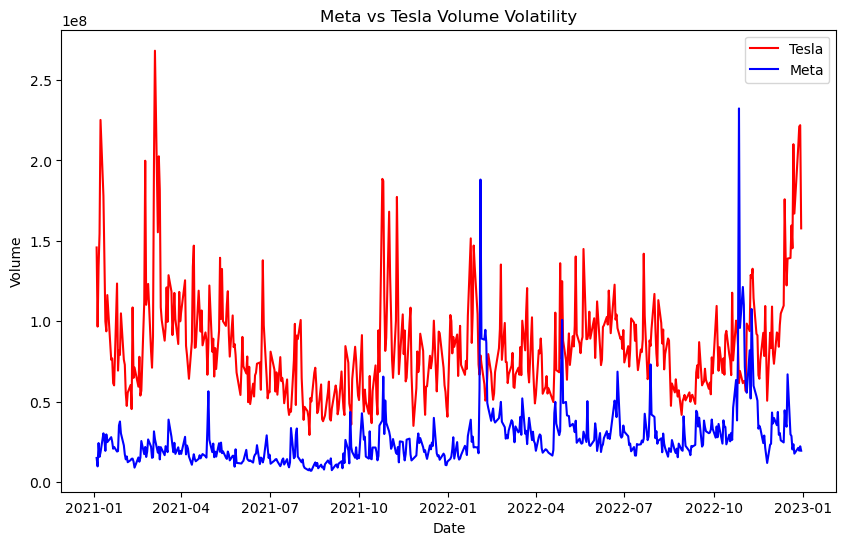

In [36]:
plt.figure(figsize = (10, 6))
sns.lineplot(data=meta_tesla, x='Date', y='Volume_tsla', label='Tesla', color='red')
sns.lineplot(data=meta_tesla, x='Date', y='Volume_meta', label='Meta', color='blue')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Meta vs Tesla Volume Volatility')
plt.legend()
plt.show()

Based on the chart provided, Tesla (represented by the red line) had significantly greater volume volatility compared to Meta (represented by the blue line). Here are some key observations:

- Tesla's volume fluctuates more dramatically, with several large spikes reaching over 2.5e8 in volume, especially in early 2021 and late 2022.
- Meta's volume remains relatively lower and more stable, with fewer and smaller spikes throughout the same time period.

In summary, Tesla exhibited much higher volume volatility than Meta during the period shown.

Q5. Create a new variables for both Tesla and Meta stocks in the dataframe that measures the daily differential in price, defined as the difference between the High Price and Low Price for the day (2 points)

In [38]:
meta_tesla['PriceDiff_meta'] = meta_tesla['High_meta'] - meta_tesla['Low_meta']
meta_tesla['PriceDiff_tsla'] = meta_tesla['High_tsla'] - meta_tesla['Low_tsla']
meta_tesla.head()

,Open_meta,High_meta,Low_meta,Close_meta,Adj Close_meta,Volume_meta,Open_tsla,High_tsla,Low_tsla,Close_tsla,Adj Close_tsla,Volume_tsla,PriceDiff_meta,PriceDiff_tsla
Date,,,,,,,,,,,,,,
2021-01-04,274.779999,275.000000,265.200012,268.940002,268.940002,15106100,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,9.799988,9.099991
2021-01-05,268.290009,272.399994,268.209991,270.970001,270.970001,9871600,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,4.190002,7.213333
2021-01-06,262.000000,267.750000,260.010010,263.309998,263.309998,24354100,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,7.739990,8.300003
2021-01-07,265.899994,271.609985,264.779999,268.739990,268.739990,15789800,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,6.829987,13.929993
2021-01-08,268.309998,268.950012,263.179993,267.570007,267.570007,18528300,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,5.770020,15.366669


Q6. Resample the data to create the average monthly price diffferences between Tesla and Meta Stock. (2 points)

In [64]:
monthly_diff = meta_tesla[['PriceDiff_tsla', 'PriceDiff_meta']].resample('ME').mean()
monthly_diff.head()

,PriceDiff_tsla,PriceDiff_meta
Date,,
2021-01-31,11.362281,8.803686
2021-02-28,12.744733,6.808423
2021-03-31,14.384638,8.769563
2021-04-30,9.516985,6.107147
2021-05-31,8.813497,6.550000


Q7. Using Plotly, create line graphs for the monthly price differences for Tesla and Meta stocks. Include the range slider. Don't show the gridlines but include the title and labels, including the legend showing both stocks (3 points)

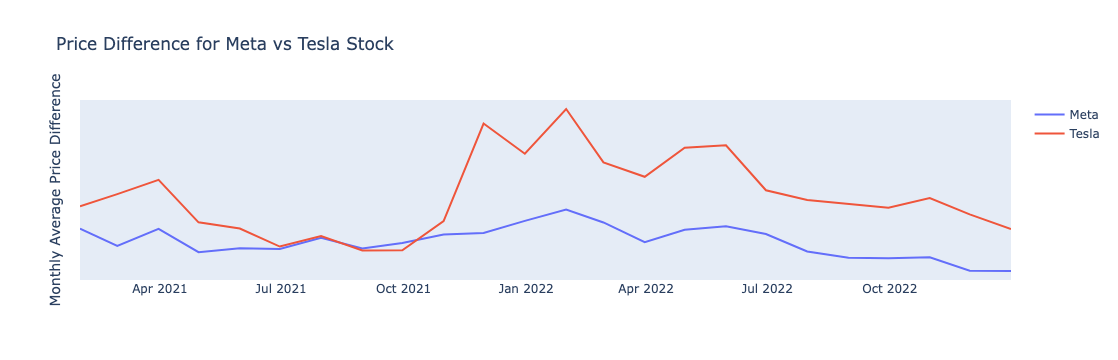

In [80]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=monthly_diff.index, y=monthly_diff['PriceDiff_meta'], name='Meta', mode='lines'))
fig.add_trace(go.Scatter(x=monthly_diff.index, y=monthly_diff['PriceDiff_tsla'], name='Tesla', mode='lines'))

fig.update_layout(
    xaxis=dict(showline=False,showgrid=False,showticklabels=True),
    yaxis=dict(showline=False,showgrid=False,showticklabels=False),
    showlegend=True,
    title='Price Difference for Meta vs Tesla Stock',
    yaxis_title='Monthly Average Price Difference'
)

fig.show()

Import the datafile bmw and rename the DataFrame bmwSales

In [86]:
bmwSales = pd.read_csv('bmw.csv')
bmwSales.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [87]:
bmwSales['transmission'].unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

Q8. Using plotly create box-plots for Automatic, Manual and Semi-Automatic transmissions, as 3 separate plot. Include the title "Price Differences by Transmission." (2 points).

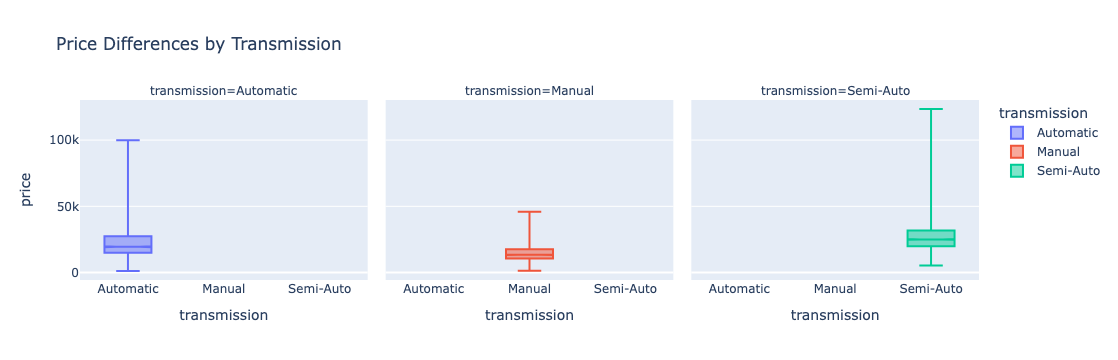

In [103]:
fig = px.box(bmwSales, x='transmission', y='price', color='transmission', facet_col='transmission', title="Price Differences by Transmission", notched=True, points=False)
fig.show()

Q9. Using plotly, create a scatterplot for BMW price (X) and mileage (Y), distinguishing between trasmission types by color. Include th box-plots for price and mileage on the margins of the plot. ( 2 points)

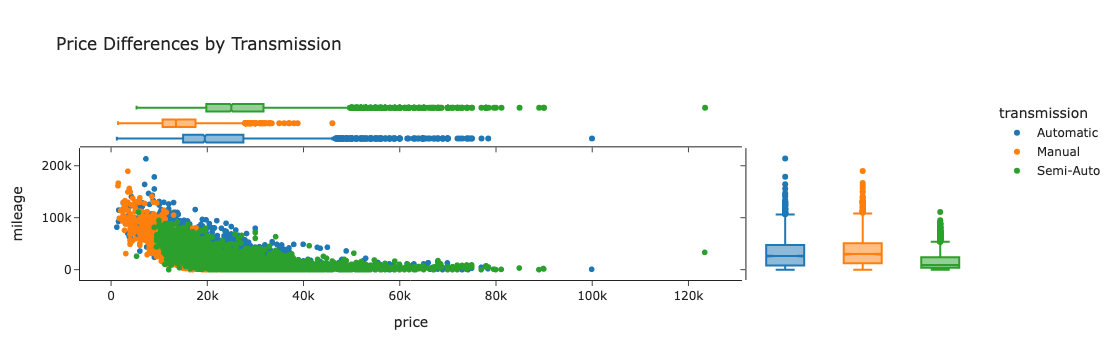

In [100]:
fig = px.scatter(bmwSales, x='price', y='mileage', color='transmission', marginal_x='box', marginal_y='box', template='simple_white', title="Price Differences by Transmission")
fig.show()

Q10.Cars are considered efficient if their mpg is greater than 35 miles per galon. Use a function (Eff) to create a new categorical variable (Efficiency) with two levels: Efficient if the mpg is greater than 35 (mpg > 35), and Inefficient otherwise (mpg <=35). (2 points) 

In [116]:
def Eff(mpg):
    return 'Efficient' if mpg > 35 else 'Inefficient'

bmwSales['Efficiency'] = [Eff(mpg) for mpg in bmwSales['mpg']]
bmwSales.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Efficiency,make
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,Efficient,BMW
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,Efficient,BMW
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,Efficient,BMW
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,Efficient,BMW
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,Efficient,BMW


Q11. Extract the data for BMW cars with model year of 2018,2019 or 2020 and price of more than 20000 and create a new dataframe called bmwSales2. (2 points)

In [102]:
bmwSales2 = bmwSales[(bmwSales['year'].isin([2018, 2019, 2020])) & (bmwSales['price'] > 20000)]
bmwSales2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Efficiency
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,Efficient
125,5 Series,2018,22600,Automatic,23195,Diesel,145,65.7,2.0,Efficient
150,5 Series,2018,21950,Automatic,21947,Diesel,150,68.9,2.0,Efficient
166,X1,2020,31498,Semi-Auto,1560,Diesel,145,60.1,2.0,Efficient
167,2 Series,2020,27998,Manual,1580,Petrol,150,43.5,1.5,Efficient


Q12. For this new dataframe,using plotly, create box plots that show the mileage (Y) for the different fuel  (X), and differentiated by color for "Efficiency.' Include the title and labels as shown. (2 points)

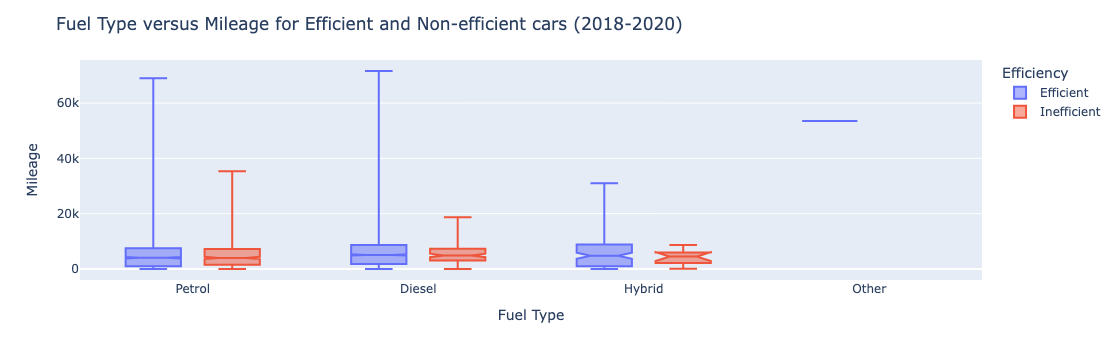

In [105]:
fig = px.box(bmwSales2, x='fuelType', y='mileage', color='Efficiency', notched=True, points=False)
fig.update_layout(
    showlegend=True,
    title='Fuel Type versus Mileage for Efficient and Non-efficient cars (2018-2020)',
    xaxis_title='Fuel Type',
    yaxis_title='Mileage'
)
fig.show()

Import the datafile audi.csv and create the Dataframe audiSales.

In [109]:
audiSales = pd.read_csv('audi.csv')
audiSales.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [112]:
audiSales.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

Q13. Add a 'make' column to the bmwSales and audiSales DataFrames to show the make of the car, either "BMW' or 'Audi." Then concatenate both Dataframes (3 points)

In [117]:
bmwSales['make'] = 'BMW'
audiSales['make'] = 'Audi'

SalesTTL = pd.concat([bmwSales, audiSales])
SalesTTL.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Efficiency,make
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,Efficient,BMW
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,Efficient,BMW
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,Efficient,BMW
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,Efficient,BMW
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,Efficient,BMW


Q14. Use the function (Eff) to create a new categorical variable (Efficiency) with two levels: Efficient if the mpg is greater than 35 (mpg > 35), and Inefficient otherwise (mpg <=35) and apply it to the concatenated dataframe SalesTTL. (2 points)

In [118]:
def Eff(mpg):
    return 'Efficient' if mpg > 35 else 'Inefficient'

SalesTTL['Efficiency'] = [Eff(mpg) for mpg in SalesTTL['mpg']]
SalesTTL.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Efficiency,make
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,Efficient,BMW
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,Efficient,BMW
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,Efficient,BMW
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,Efficient,BMW
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,Efficient,BMW


Q15. Using plotly, create box plots that show the Price (Y) for the 'make (X), and differentiated by color for "Efficiency." Include the title and y-label as shown (3 points)

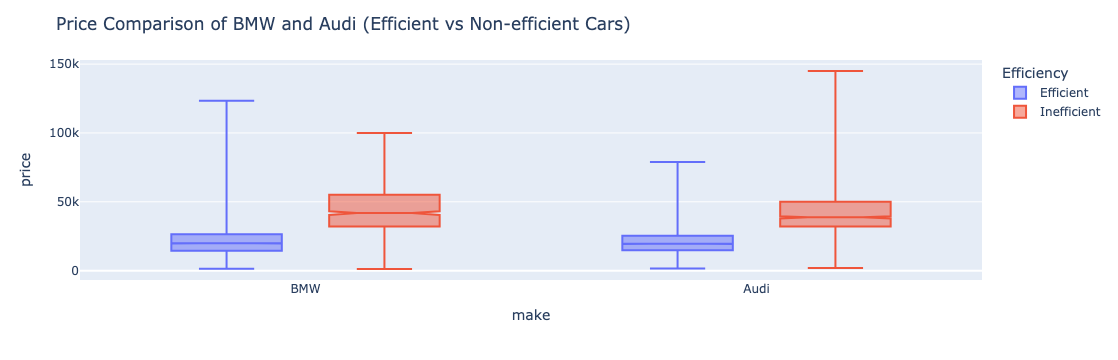

In [124]:
fig = px.box(SalesTTL, x='make', y='price', color='Efficiency', notched=True, points=False)
fig.update_layout(
    showlegend=True,
    title='Price Comparison of BMW and Audi (Efficient vs Non-efficient Cars)'
)
fig.show()

Q16. Extract the data for BMW or Audi cars and with model years of 2019 or 2020 and store to a new dataframe SalesTTL2 (2 points)

In [125]:
SalesTTL2 = SalesTTL[(SalesTTL['year'].isin([2019, 2020]))]
SalesTTL2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Efficiency,make
26,3 Series,2019,17800,Automatic,22310,Diesel,145,64.2,2.0,Efficient,BMW
166,X1,2020,31498,Semi-Auto,1560,Diesel,145,60.1,2.0,Efficient,BMW
167,2 Series,2020,27998,Manual,1580,Petrol,150,43.5,1.5,Efficient,BMW
168,X5,2020,54998,Semi-Auto,1500,Diesel,150,37.7,3.0,Efficient,BMW
170,2 Series,2020,25998,Automatic,3160,Hybrid,140,113.0,1.5,Efficient,BMW


Q17. Using plotly, create box plots that show the Price (Y) for the 'make (X), and differentiated by color for "Efficiency." Include the title and y-axis label as shown. (3 points)

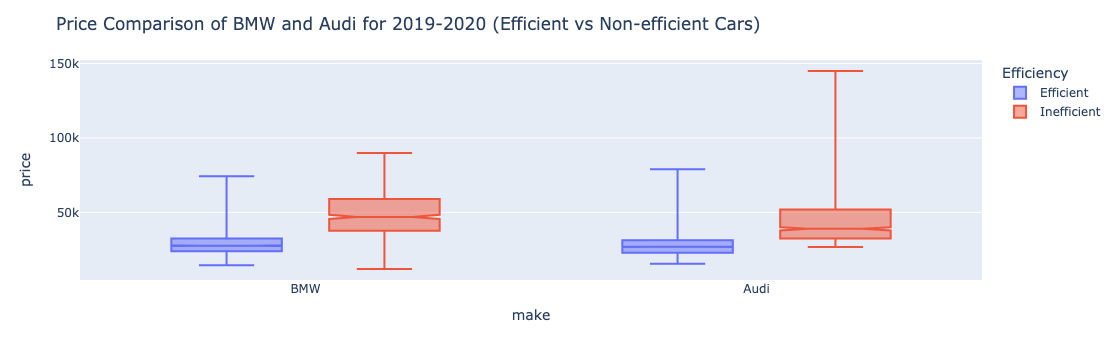

In [126]:
fig = px.box(SalesTTL2, x='make', y='price', color='Efficiency', notched=True, points=False)
fig.update_layout(
    showlegend=True,
    title='Price Comparison of BMW and Audi for 2019-2020 (Efficient vs Non-efficient Cars)'
)
fig.show()

Can we conclude that for BMW and Audi Cars that are efficient, the median and IQR of in price are somewhat similar? Explain

We can conclude that for BMW and Audi cars that are efficient, the median and interquartile range (IQR) of the prices are somewhat similar based on the box plot.

1. Median:
   - The median price for efficient BMW cars (blue box) is below 50k.
   - The median price for efficient Audi cars (blue box) is below 50k.
   - Both brands' efficient models have very close median prices, indicating similar central tendencies.
2. IQR (Interquartile Range):
   - The IQR for efficient BMW cars is represented by the height of the blue box, which appears relatively narrow.
   - The IQR for efficient Audi cars is also represented by a blue box of similar height, indicating that the spread of prices between the first and third quartiles is comparable to that of BMW’s efficient models.

In summary, both the median and IQR for efficient BMW and Audi cars are quite similar, suggesting that their price distributions are comparable.